In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, add_dummy_feature
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
m = 10000
X = 3 * np.random.rand(m, 1) + 2
Y = 3 * X**5 - 2 * X**4 + 0.5 * X**3 - 20 * X**2 + 8 * X + 5 + np.random.randn(m,1)

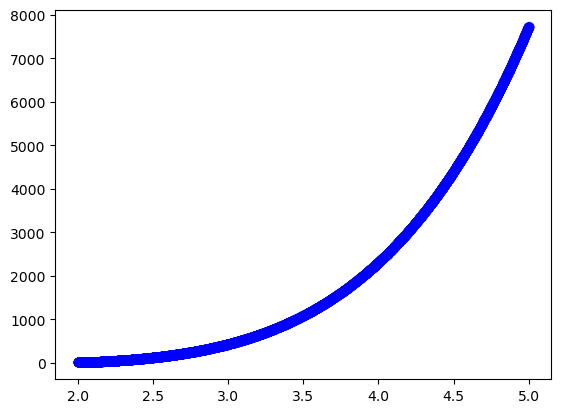

In [145]:
plt.plot(X, Y, 'bo', alpha=0.5)
plt.show()

In [146]:
Poly_transform = PolynomialFeatures(degree = 5, include_bias= False)
scaler = StandardScaler()
X_new = scaler.fit_transform(X = Poly_transform.fit_transform(X))
print(X[0])
print(X_new[0])

[3.02430135]
[-0.5479755  -0.62909199 -0.68043325 -0.70532815 -0.70966592]


In [147]:
model = LinearRegression()
model.fit(X_new, Y)
print(model.intercept_)
print(model.coef_)
print(model.score(X_new, Y))

[1966.05880931]
[[  16.88391557 -160.80999313   76.22131475 -385.45281522 2573.27316029]]
0.9999997827552848


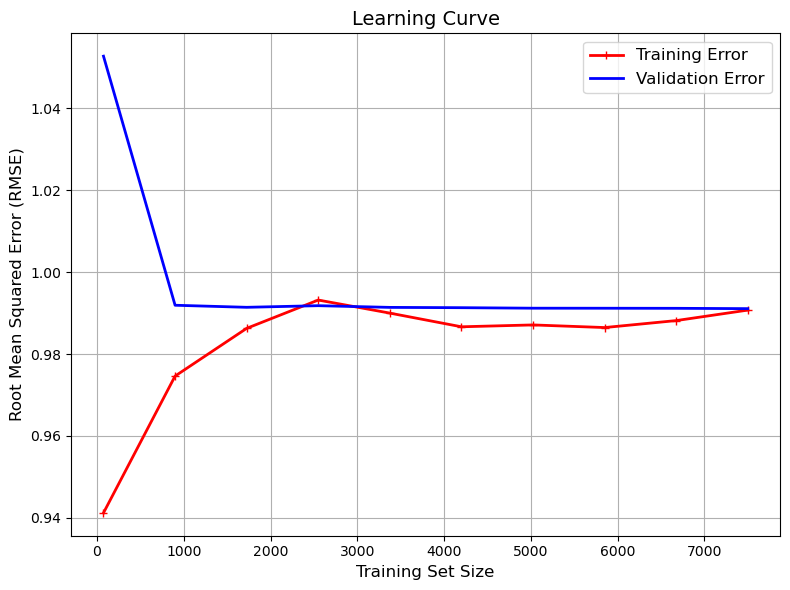

In [148]:
train_size_abs, train_scores, test_scores = learning_curve(LinearRegression(), X_new, Y, cv = 4, 
                                                           scoring="neg_root_mean_squared_error", train_sizes = np.linspace(0.01, 1, 10), )
train_errors = -train_scores.mean(axis=1)
test_scores = -test_scores.mean(axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_size_abs, train_errors, "r-+", linewidth=2, label="Training Error")
plt.plot(train_size_abs, test_scores, "b-", linewidth=2, label="Validation Error")
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.title("Learning Curve", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [149]:
Poly_regression = make_pipeline(
    PolynomialFeatures(degree = 5, include_bias= False),
    StandardScaler(),
    LinearRegression()
)

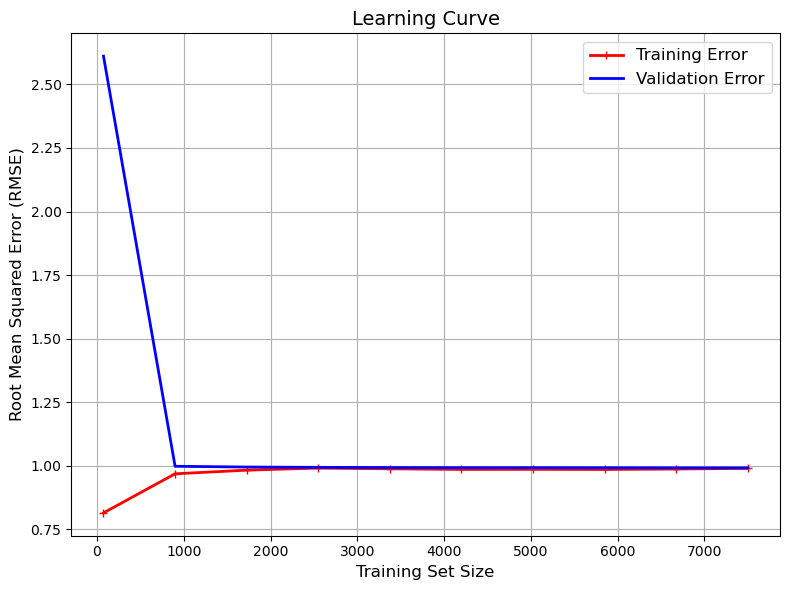

In [150]:
train_size_abs, train_scores, test_scores = learning_curve(Poly_regression, X_new, Y, cv = 4, 
                                                           scoring="neg_root_mean_squared_error", train_sizes = np.linspace(0.01, 1, 10), )
train_errors = -train_scores.mean(axis=1)
test_scores = -test_scores.mean(axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_size_abs, train_errors, "r-+", linewidth=2, label="Training Error")
plt.plot(train_size_abs, test_scores, "b-", linewidth=2, label="Validation Error")
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.title("Learning Curve", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [151]:


def polynomial_features(X, degree):
    poly_features = [X**i for i in range(1, degree + 1)]
    return np.hstack(poly_features) 
degree = 5
X_poly = polynomial_features(X, degree)

print(X_poly)


[[3.02430135e+00 9.14639868e+00 2.76614659e+01 8.36566088e+01
  2.53002795e+02]
 [2.97684938e+00 8.86163221e+00 2.63797443e+01 7.85285254e+01
  2.33767592e+02]
 [2.61036387e+00 6.81399953e+00 1.77870182e+01 4.64305896e+01
  1.21200734e+02]
 ...
 [4.90491115e+00 2.40581534e+01 1.18003105e+02 5.78794746e+02
  2.83893681e+03]
 [4.74346835e+00 2.25004920e+01 1.06730372e+02 5.06272142e+02
  2.40148588e+03]
 [2.93733555e+00 8.62794014e+00 2.53431553e+01 7.44413511e+01
  2.18659227e+02]]


In [152]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

XPS, mean, std = standardize(X_poly)

print(XPS)

[[-0.5479755  -0.62909199 -0.68043325 -0.70532815 -0.70966592]
 [-0.60302459 -0.67594895 -0.71852449 -0.73510035 -0.73218583]
 [-1.02818482 -1.01287715 -0.97389013 -0.92145187 -0.8639752 ]
 ...
 [ 1.63372194  1.82456623  2.00441315  2.16930369  2.31785596]
 [ 1.44643198  1.56826047  1.66940088  1.74825798  1.80570359]
 [-0.64886462 -0.71440187 -0.74933069 -0.75882932 -0.74987418]]


In [156]:
#result = np.linalg.inv(XPS.T @ XPS) @ XPS.T @ Y
#result = np.linalg.pinv(XPS) @ Y
result, residuals, rank, s = np.linalg.lstsq(XPS, Y, rcond=None)
print(result)
print(np.mean((Y - XPS @ result)**2))

[[  16.88394462]
 [-160.81012222]
 [  76.2215344 ]
 [-385.45298385]
 [2573.27320931]]
3865388.2233024393


In [154]:
def standardize_test(X_test, mean, std):
    return (X_test - mean) / std

In [155]:
X_new = 3 * np.random.rand(1000, 1) + 2
X_new = polynomial_features(X_new, degree)
X_new = standardize_test(X_new, mean, std)
Y_true = 3 * X_new**5 - 2 * X_new**4 + 0.5 * X_new**3 - 20 * X_new**2 + 8 * X_new + 5 + np.random.randn(1000,1)
Y_pred = X_new @ result
mse = np.mean((Y_true - Y_pred)**2)
print(mse)

4937038.513973086
